### <font color='blue'> Import the libraries </font>

In [ ]:
from fastai.tabular import * 
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### <font color='blue'> Read the preprocessed data </font>

In [69]:
train=pd.read_csv('/home/trabeya/cse_ml/data/train_split.csv')

In [70]:
val=pd.read_csv('/home/trabeya/cse_ml/data/val_split.csv')

In [71]:
val.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,hour_of the_day_pickpup,hour_of the_day_drop,day_of_the_week_pickup,distance,label
0,10.5,1686.0,161.0,0.0000,131.0,920.81,14.0,14.0,3.0,3.0,1
1,10.5,44851.0,43695.0,2524.1838,705.0,2917.99,21.0,9.0,6.0,12.0,1
2,10.5,1454.0,565.0,32.9395,5.0,255.97,9.0,9.0,6.0,0.0,0
3,10.5,1037.0,30.0,1.7490,358.0,210.02,13.0,14.0,5.0,3.0,0
4,10.5,560.0,102.0,0.0000,64.0,161.21,23.0,23.0,3.0,2.0,0


In [72]:
val_label=val[['label']]

In [73]:
cont_names = [i for i in train.columns]

In [74]:
val = TabularList.from_df(val, cont_names=cont_names)

In [75]:
data = (TabularList.from_df(train, path='.',cont_names=cont_names,)
                        .split_by_idx(list(range(0,200)))
                        .label_from_df(cols = 'label')
                        .add_test(val)
                        .databunch())

In [139]:
learn = tabular_learner(data, layers=[100, 50, 5], metrics=accuracy, emb_drop=0.8, callback_fns=ShowGraph)

In [140]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


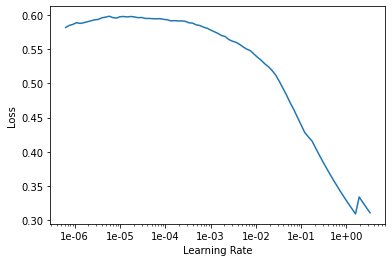

In [141]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.287385,0.259647,1.000000,00:01


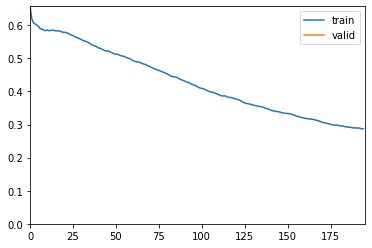

In [142]:
learn.fit_one_cycle(1, max_lr=slice(1e-03))

In [143]:
predictions,_=learn.get_preds(DatasetType.Test)

In [144]:
labels = np.argmax(predictions, 1)

In [146]:
accuracy_val = accuracy_score(val_label,labels)
print('\naccuracy_score on val dataset : ', accuracy_val)


accuracy_score on val dataset :  0.9992927864214993


### <font color='blue'> Train on whole training dataset</font>

In [147]:
train=pd.read_csv('/home/trabeya/cse_ml/data/train_prep.csv')

In [148]:
train.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,hour_of the_day_pickpup,hour_of the_day_drop,day_of_the_week_pickup,distance
0,10.5,834.0,56.0,0.0000,64.0,270.32,0,0,0,4,5
1,10.5,791.0,47.0,0.0000,134.0,197.85,0,0,1,4,3
2,10.5,1087.0,80.0,0.0000,61.0,301.64,0,1,1,4,6
3,10.5,598.0,271.0,15.6638,68.0,82.30,0,2,2,4,0
4,10.5,3407.0,182.0,0.0000,112.0,1065.02,0,5,6,4,24


In [149]:
test_prep=pd.read_csv('/home/trabeya/cse_ml/data/test_prep.csv')

In [150]:
test_prep.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,hour_of the_day_pickpup,hour_of the_day_drop,day_of_the_week_pickup,distance
0,10.5,924,42,2.4486,148,289.27,0,0,5,6
1,10.5,4249,20,0.0000,91,1912.70,1,2,5,41
2,10.5,1552,255,2.6588,23,394.00,5,5,5,5
3,10.5,462,16,0.0000,198,154.32,5,5,5,3
4,10.5,814,392,12.3692,69,147.47,7,7,5,2


In [151]:
test = TabularList.from_df(test_prep,cont_names=cont_names)

In [152]:
data = (TabularList.from_df(train, path='.',cont_names=cont_names,)
                        .split_by_idx(list(range(0,200)))
                        .label_from_df(cols = 'label')
                        #.add_test(test)
                        .databunch())

In [154]:
learn = tabular_learner(data, layers=[100, 50, 5], metrics=accuracy, emb_drop=0.8, callback_fns=ShowGraph)

In [155]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


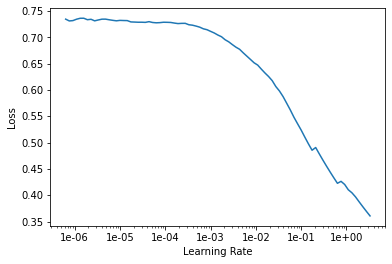

In [156]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.602407,0.616755,0.970000,00:01
1,0.466292,0.513701,0.985000,00:01
2,0.394913,0.396312,0.995000,00:01
3,0.362358,0.370379,0.995000,00:01
4,0.358356,0.376102,0.995000,00:01


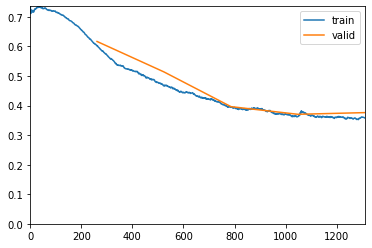

In [157]:
learn.fit_one_cycle(5, max_lr=slice(1e-04))

In [158]:
predictions,_=learn.get_preds(test)

In [159]:
predictions=predictions[-8576:]

In [161]:
test_labels = np.argmax(predictions, 1)

In [162]:
len(test_labels)

8576

In [163]:
submission=pd.DataFrame(test_labels,columns=['prediction'])

In [164]:
for i in range(len(submission)):
    if submission['prediction'][i]==0:
        submission['prediction'][i]=1
    else:
        submission['prediction'][i]=0

In [166]:
test=pd.read_csv('/home/trabeya/cse_ml/data/test.csv')

In [168]:
submission['tripid']=test[['tripid']]

In [169]:
final_submition=submission[['tripid','prediction']]

In [171]:
final_submition.to_csv('/home/trabeya/cse_ml/data/final_submition_fastai_v2.csv',index=False)